Authors       | Email                  |
:--------------|:----------------------|
Rezwanul      | rezwanul.cse@gmail.com |


## Problem: Predict which patients are at risk of "Diabetes Mellitus"
### Problem class: Supervised Classification

### Problem dataset link: [kaggle dataset link](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data) |

### Problem description:

 Diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage

### Problem Task:  Build a machine learning model to accurately predict whether or not the patients in the dataset have "Diabetes Mellitus" or not?

# Import Libraries

In [19]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import numpy as np

# Loading data

In [3]:
# URL = "https://storage.googleapis.com/kagglesdsdata/datasets/228/482/diabetes.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1574499517&Signature=nsb4mSEK59QstjmPpcq7zWS%2FWiAgcDQVdywOIKVPZlp1wpbxSVbyRLUjuAhjT0hIVUIGDVNosfU57kw1%2B3xNyNswSFZ7SWTxUEkoJDBaivAshzFBGB87JtQNmeCeRcP4ys9Z%2FQ9ARbO7Cd0u6CzxwGAFzehtJKjhjTqWufshAA%2F41ml3jN%2Fbfmr1RdndFDCaCxHeLqTDvWzd0YntqyJ4sME277GMc5Z6qufxtaNZmrPNVD%2BX6N1ZJSw8vocIcrq2FpO8lZCmp96hwGPJe9mpKUnATCAlWcyfgNLwYAD3AzKHQiJVMMGHQjNIMAgeSz74qTlV7tHe9NFGCxaRzfkDGA%3D%3D&response-content-disposition=attachment%3B+filename%3Ddiabetes.csv"
# df = pd.read_csv(URL, names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
df = pd.read_csv('data/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Dataset Description
1. Pregnancies: Number of previous pregnancies
2. Glucose: Plasma glucose concentration
3. BloodPressure: Diastolic blood pressure
4. SkinThickness: Skin fold thickness measured from the triceps
5. Insulin : Blood serum insulin concentration
6. BMI: Body mass index
7. DiabetesPedigreeFunction: A summarized score that indicates the genetic predisposition of the patient for diabetes, as extrapolated from the patient's family record for diabetes
8. Age: Age in years
9. Outcome: The target variable we are trying to predict, 1 for patients that developed diabetes within five years of the initial measurement, and 0 otherwise

# Exploratory data analysis

### Visualizing the distribution

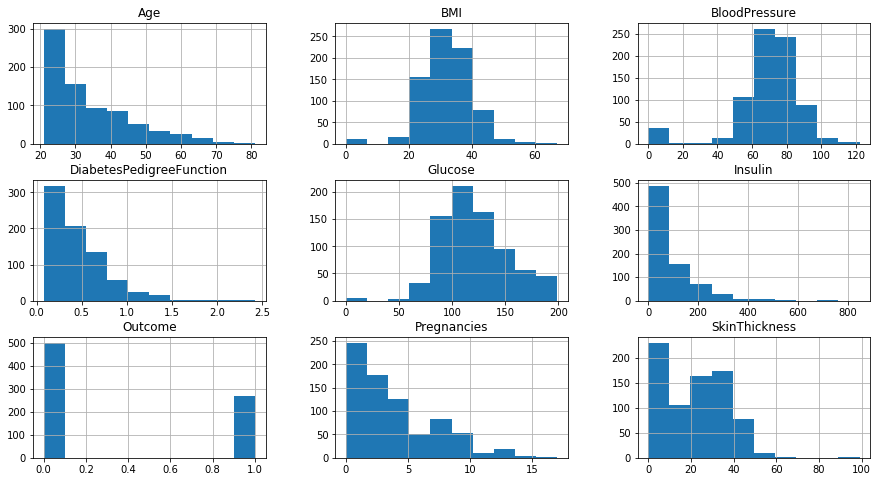

'\nInsight: From the histogram for Age, we can see that most of the data was collected from young\npeople, with the most common age group between 20-30 years old. We can also see that the \ndistribution for BMI, BloodPressure, and Glucose concentration is normally distributed (that is, \na bell curve shape), which is what we we expect when we collect such statistics from a population.\n'

In [6]:
df.hist(figsize=(15,8))
plt.show()

"""
Insight: From the histogram for Age, we can see that most of the data was collected from young
people, with the most common age group between 20-30 years old. We can also see that the 
distribution for BMI, BloodPressure, and Glucose concentration is normally distributed (that is, 
a bell curve shape), which is what we we expect when we collect such statistics from a population.
"""

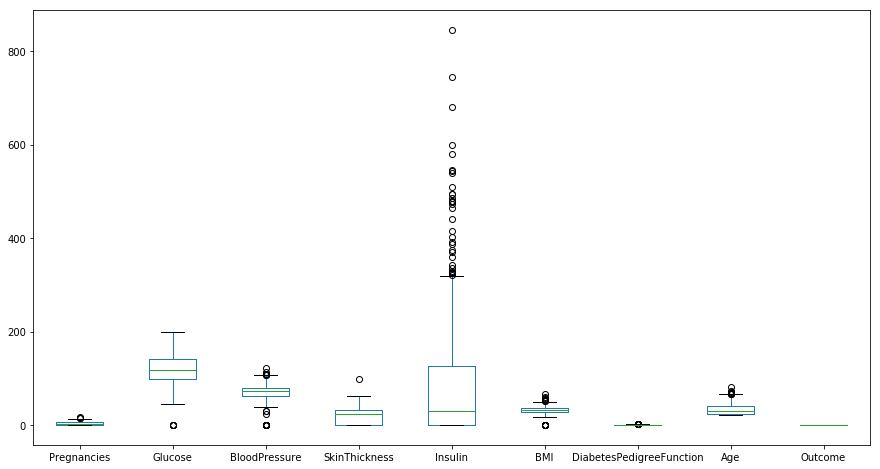

In [8]:
df.plot.box(figsize=(15,8))

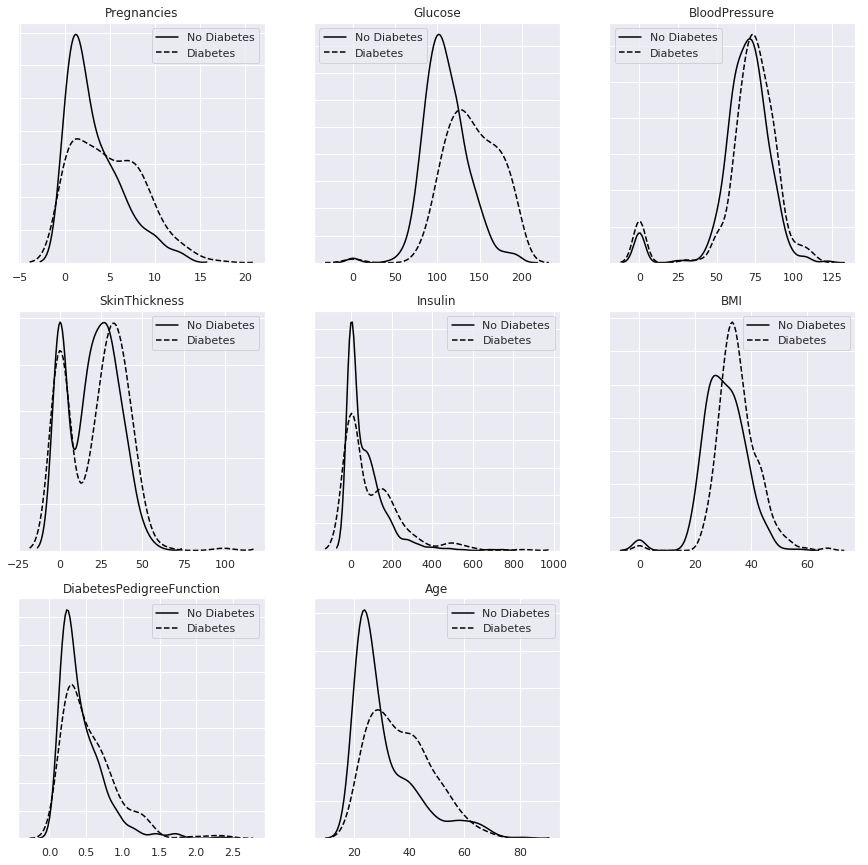

In [11]:
# create a subplot of 3 x 3
plt.subplots(3, 3, figsize=(15, 15))

# Plot a density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3, 3, idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel=False, kde_kws={
                                                                                    'linestyle': '-',
                                                                                    'color': 'black',
                                                                                    'label': 'No Diabetes'
                                                                                    })
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel=False, kde_kws={
                                                                                    'linestyle': '--',
                                                                                    'color': 'black',
                                                                                    'label': 'Diabetes'
                                                                                    })
    ax.set_title(col)

# Hide the 9th subplot (bottom right) since there are only 8 plots
plt.subplot(3, 3, 9).set_visible(False)

plt.show()
"""
Insight: Glucose variable, we can see that among the non-diabetics (solid line), the
curve has a normal distribution centered around the value 100. This tells us
that among non-diabetics, most people have a blood glucose value of 100
mg/dL 

Diabetics (dashed line), the curve
is wider and is centered around a value of 150. This tells us that diabetics
tends to have a wider range of blood glucose value, and the average blood
glucose value is around 150 mg/dL

Note: A similar analysis can also be made for the variable BMI and Age
"""

In [ ]:
"""
variables such as BloodPressure and SkinThickness, there is no significant difference in the distribution between
diabetics and non-diabetics. The two groups of people tend to have similar blood pressure and skin thickness values. 
Therefore, BloodPressure and SkinThickness are poorer predictors for diabetes.
"""

# Data Preprocessing

### Handling missing values

In [13]:
# Checking if there's any null values in the dataset

df.isnull().any()

# Insight: It seems like there are no missing values in the dataset, but are we sure about these?

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [14]:
# Statistical summary of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


```
# Insight: 
There are 768 rows of data, and the Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, 
and BMI columns have a minimum value of 0.

# Note: 
The measurements for Glucose, BloodPressure, SkinThickness, Insulin, and BMI should never be 0

# Conclusions: 
This is an indication that there are missing values in the dataset.
The values were probably recorded as 0 due to certain issues during data collection. Perhaps the equipment 
was faulty, or the patient was unwilling to have their measurements taken.
```

In [23]:
def data_contain_any_zero_values(df: pd.DataFrame):
    print("Number of rows with 0 values for each variable")
    for col in df.columns:
        missing_rows = df.loc[df[col]==0].shape[0]
        print(col + ': ' + str(missing_rows))

In [17]:
data_contain_any_zero_values(df)

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [18]:
# Insight:  In the Insulin column, there are 374 rows with 0 values. That is almost half of
# the data that we have! Clearly, we cannot discard these rows with 0 values as that will 
# use a significant drop in model performance

### Techniques to handle missing values
1. Remove (discard) any rows with missing values.
2. Replace the missing values with the mean/median/mode of the nonmissing values.
3. Predict the actual values using a separate machine learning model.

#### Note
The missing values comes from continuous variables such as Glucose,
BloodPressure, SkinThickness, Insulin, and BMI, we will replace the missing values
with the mean of the non-missing values.


In [21]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [26]:
data_contain_any_zero_values(df)

# Insight: we did not modify the Pregnancies column as 0 values in that column (that is, 0 previous pregnancies) are perfectly valid.

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [28]:
# Replaceing NaN values with the mean of the non-missing values
df["Glucose"] = df["Glucose"].fillna(df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].fillna(df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].fillna(df["SkinThickness"].mean())
df["Insulin"] = df["Insulin"].fillna(df["Insulin"].mean())
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())

## Data Standardization

In [30]:
# Data standardization is another important technique in data preprocessing.
# The goal of data standardization is to transform the numeric variables so that
# each variable has zero mean and unit variance

# Note
In neural networks, it is important to standardize the data in order to ensure that the backpropagation algorithm
works as intended. Another positive effect of data standardization is that it shrinks the magnitude of the variables, 
transforming them to a scale that is more proportional.